<h1><center>
    ECE 438 - Laboratory 6b<br/>
    Discrete Fourier Transform and Fast Fourier Transform Algorithms (Week 2)<br/>
    <small>Last updated on February 27, 2022</small><br/>
    <br/>
    Date:3/2<br/>
    Section:<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 [Ruixiang Wang]| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding of the frequency range of DFT and effects of zero-padding (50 pts)**: *DFT and DTFT plots, Python code (DTFTsamples), questions*||||
|**Implementation of Divide-and-Conquer DFT and FFT (50 pts)**: *Python codes (dcDFT, fft2, fft4, fft8, fft_stages), questions*||||

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper import DTFT, DFTsum, hamming

In [2]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<StemContainer object of 3 artists>

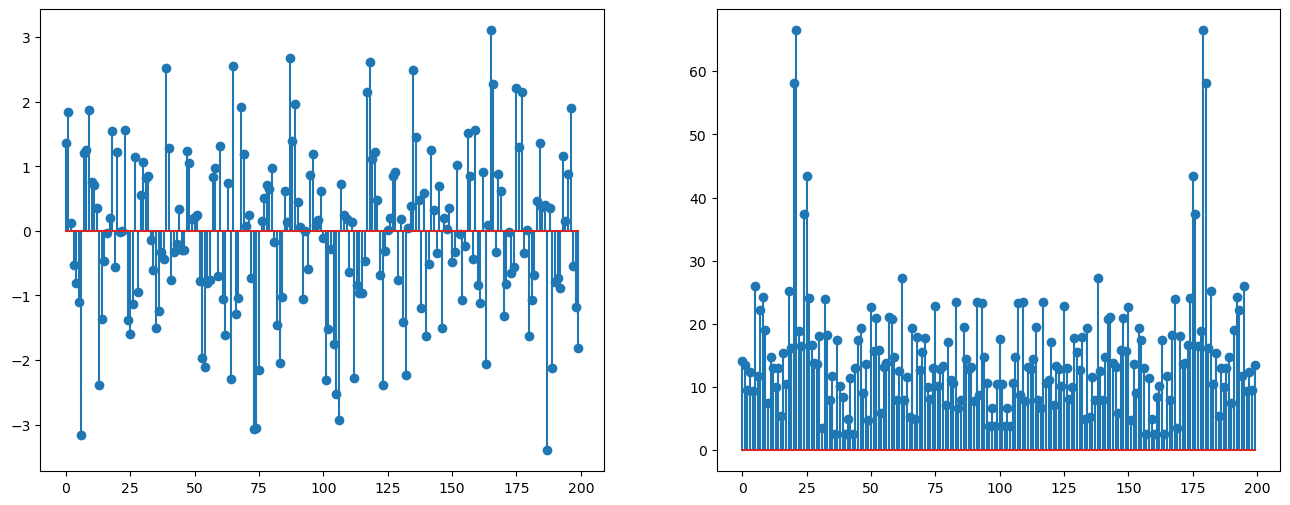

In [12]:
N = 200
n = np.linspace(0,N-1,N)
w1 = 0.64402649
w2 = 0.79168135
a = 0.4
b = 1
d = np.random.normal(0, size=N)
x = np.cos(w1*n) + a*np.cos(w2*n) + b*d

plt.subplot(1,2,1)
plt.stem(n,x)

X = DFTsum(x)
plt.subplot(1,2,2)
plt.stem(n,np.abs(X))

In [13]:
def IDFTsum(X):
    '''
    Parameters:
    ---
    X: the N point vector containing the DFT
    
    Returns:
    ---
    x: the corresponding time-domain signal
    '''
    
    x = [0]*len(X)
    for n in range(0, len(X)):
        for k in range(0, len(X)):
            x[n] += (X[k]*np.exp(1j*2*np.pi*n*k/len(x))/len(X)).astype(complex)

    return x

In [15]:
x1 = [0,1,2,3,3,3,2,1,0,0]
x2 = [1,1,1,1,-1,-1,-1,-1,0,0]

X1 = DFTsum(x1)
X2 = DFTsum(x2)

Y = X1*X2

y = IDFTsum(Y)
print(y)

[(-10.000000000000002-8.208708032177133e-15j), (-8.000000000000004-5.773159728050814e-15j), (-3.0000000000000036-8.881784197001252e-16j), (2.9999999999999982+1.7763568394002505e-15j), (7.999999999999999+2.220446049250313e-15j), (10.000000000000002+1.7607407140277449e-15j), (8.000000000000002+8.881784197001252e-16j), (3.0000000000000155+5.329070518200751e-15j), (-3.0000000000000027+8.881784197001252e-16j), (-8.000000000000014+1.687538997430238e-14j)]


<h3 style="color:red;"><left>Exercise 2.1: Shifting the Frequency Range</left></h3>

**1. Create a Hamming window ```x``` of length ```N = 20```, using the provided function `hamming()`, then compute the 20 point DFT of `x` using the provided function `DFTsum()`, and finally, plot the magnitude of the DFT, $|X_{20}(k)|$, versus the index $k$.**

<StemContainer object of 3 artists>

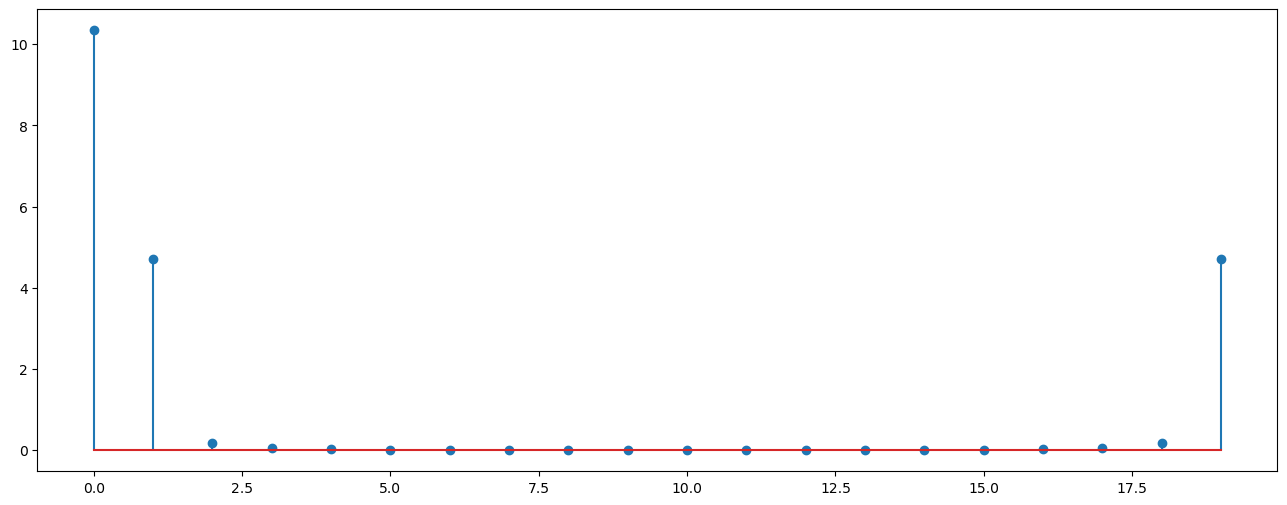

In [24]:
x = hamming(20)
X_20 = DFTsum(x)
k = np.linspace(0,19,20)
plt.stem(k, np.abs(X_20))


**2. Complete the function `DTFTsamples` below to compute the samples of the DTFT and their corresponding frequencies.**

**Note:** Your function ```DTFTsamples(x)``` should call your function `DFTsum()` and use the function ```np.fft.fftshift()```.

In [30]:
def DTFTsamples(x):
    """
    Compute samples of the DTFT and their corresponding frequencies in the range -np.pi to np.pi
    
    Parameters:
    ---
    x: an N-point vector
    
    Returns:
    ---
    X: the length N vector of DTFT samples
    w: he length N vector of corresponding radial frequencies
    """
    k = np.linspace(0, len(x)-1, len(x))
    w = 2*np.pi*k/len(x)
    w[w>=np.pi] = w[w>=np.pi] - 2*np.pi
    N = len(x)
    X1 = DFTsum(x)
#     print(w)
    X = np.fft.fftshift(X1)
    w = np.fft.fftshift(w)
    return X, w

**3. Use your function ```DTFTsamples``` to compute DTFT samples of the Hamming window of length $N = 20$. Plot the magnitude of these DTFT samples versus frequency in rad/sample.**

<StemContainer object of 3 artists>

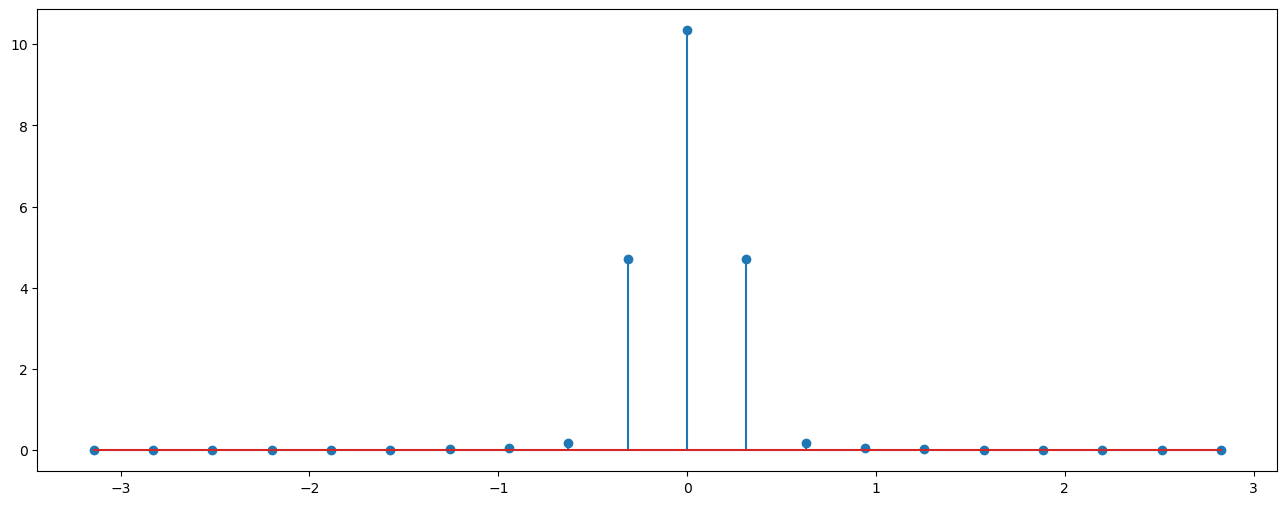

In [31]:
X_20,w = DTFTsamples(x)
# print(w)
plt.stem(w, np.abs(X_20))

<h3 style="color:red;"><left>Exercise 2.2: Zero Padding</left></h3>

**1. For $N=50$, compute the vector $x$ containing the values $x[0],\dots, x[N − 1]$, then compute the samples of $X[k]$ using your function ```DTFTsamples()```, and finally plot the magnitude of the DTFT samples versus frequency in rad/sample.**

<StemContainer object of 3 artists>

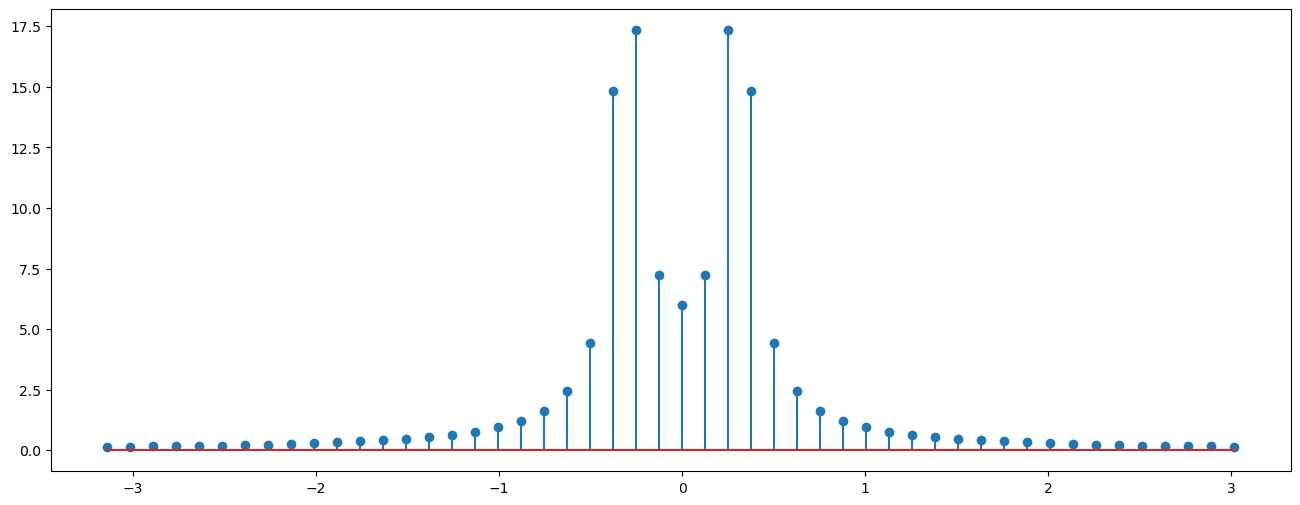

In [32]:
N = 50
x = [0]*N

for n in range(0, N-1, 1):
    x[n] = np.sin(0.1*np.pi*n)

X,w = DTFTsamples(x)

plt.stem(w, np.abs(X))

**2. For $N=100$, compute the vector $x$ containing the values $x[0],\dots, x[N − 1]$, then compute the samples of $X[k]$ using your function ```DTFTsamples()```, and finally plot the magnitude of the DTFT samples versus frequency in rad/sample.**

<StemContainer object of 3 artists>

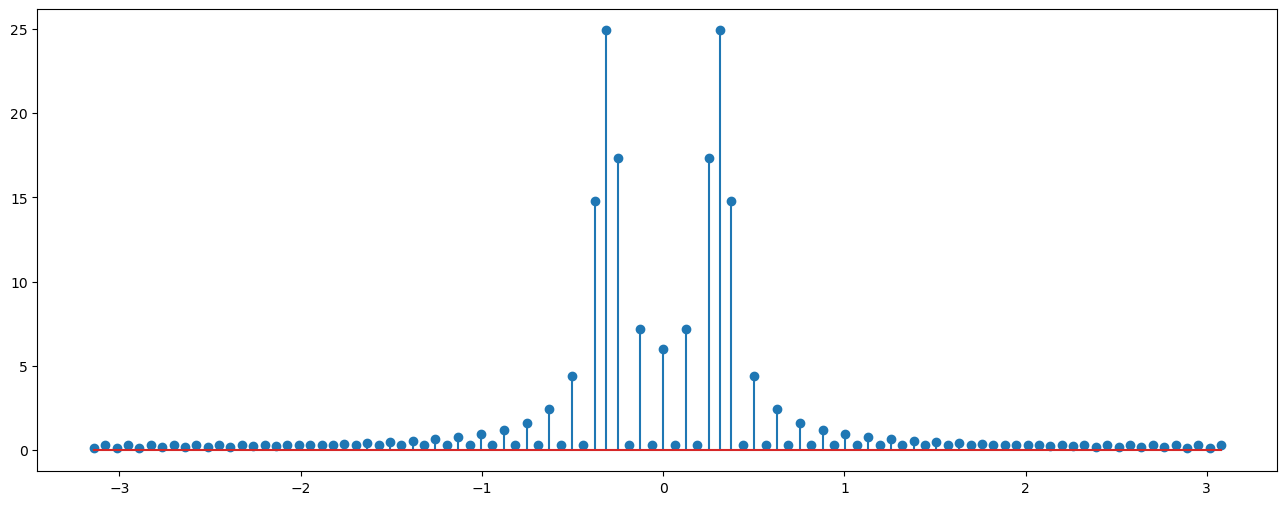

In [33]:
N = 100
x = [0]*N

for n in range(0, 49, 1):
    x[n] = np.sin(0.1*np.pi*n)

    
for n in range(50, N-1, 1):
    x[n] = 0
    
X,w = DTFTsamples(x)

plt.stem(w, np.abs(X))

**3. Which plot looks more like the true DTFT?**

N = 100 looks more like the true DTFT because it has more sample point

**3. Explain why the plots look so different.**

The zeros pedding increase sampling point by increase N -> increase k

<h3 style="color:red;"><left>Exercise 3.1: Implementation of Divide-and-Conquer DFT</left></h3>

**1. Complete the function `dcDFT` below.**

In [54]:
def dcDFT(x):
    """
    Parameters:
    ---
    x: a vector of even length N
    
    Returns: the DFT of x
    """
    
    # Step 1
    # Separate the samples of x into even and odd points.
    # Hint: The Python function x0 = x[0:N:2] can be used to obtain the “even” points.
    N = len(x)
    x0 = x[0:N:2]
    x1 = x[1:N:2]
    
    # Step 2
    # Use your function DFTsum to compute the two N/2 point DFT’s.
    X0 = DFTsum(x0)
    X1 = DFTsum(x1)
    
    # Step 3
    # Multiply by the twiddle factors$
    N_div_2 = int(N/2)
    W = [0]*N_div_2
    for k in range(N_div_2):
        W[k] = np.exp(-1j*2*np.pi*k/N)
    X_k = [0]*N
    
    # Step 4
    # Combine the two DFT’s to form X
    for k in range(N_div_2):
        X_k[k] = X0[k] + W[k]*X1[k]
        
    for k in range(N_div_2):
        X_k[k+N_div_2] = X0[k] - W[k]*X1[k]
    
    X = X_k
    return X

**2. Test your function ```dcDFT``` by using it to compute and plot the DFT’s of the following signals:**

* $x[n]=\delta[n]$ for $N=10$
* $x[n]=1$ for $N=10$
* $x[n]=e^{j2\pi n/10}$ for $N=10$

**Make sure you plot the results in separate cells.**

<StemContainer object of 3 artists>

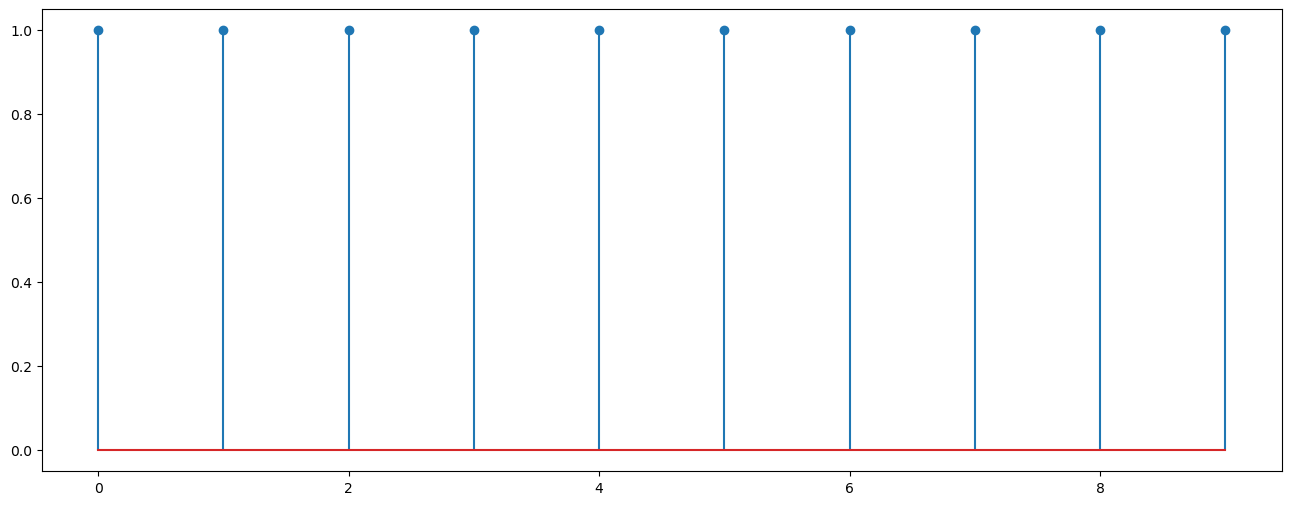

In [55]:
n = np.linspace(0, 9, 10)
x = [0]*len(n)
x[0] = 1
X1 = dcDFT(x)
plt.stem(n,X1)

<StemContainer object of 3 artists>

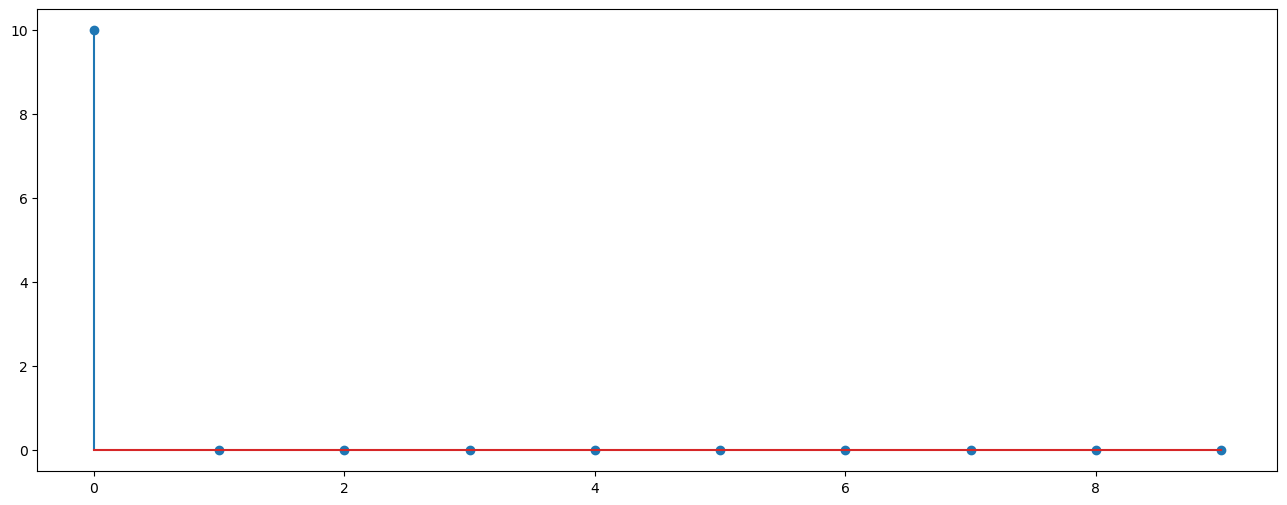

In [56]:
x = [1]*len(n)
X2 = dcDFT(x)
plt.stem(n,X2)


<StemContainer object of 3 artists>

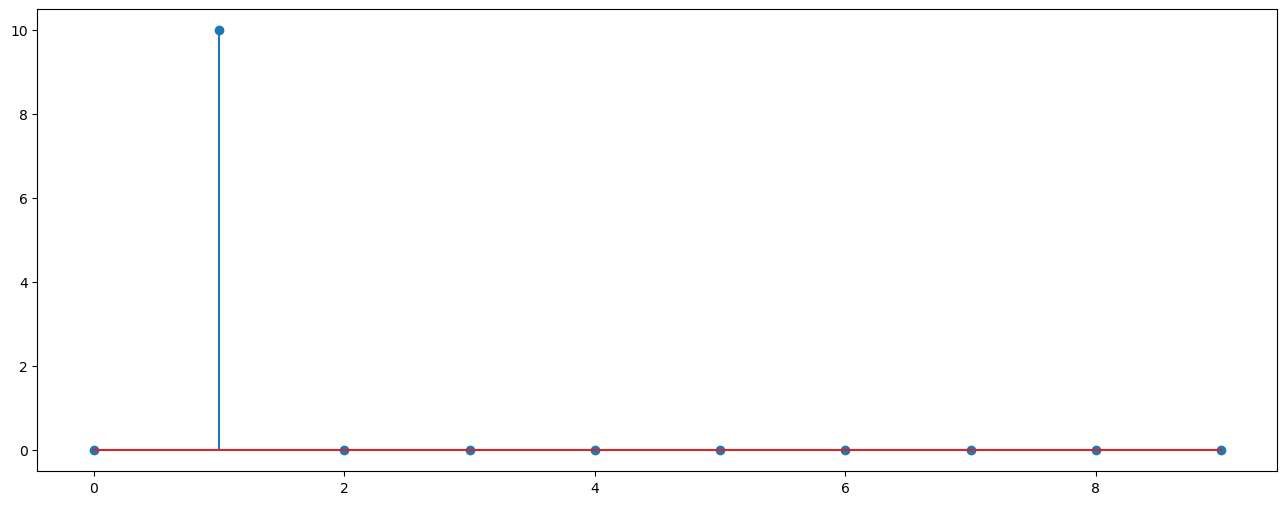

In [57]:
x = [0]*len(n)
for i in range(len(n)):
    x[i] = np.exp(1j*2*np.pi*i/10)
X3 = dcDFT(x)
plt.stem(n,X3)


**3. Determine the number of multiplies that are required in this approach to computing an $N$ point DFT. (Consider a multiply to be one multiplication of real or complex numbers.)**

**Hint:** Refer to the diagram of Figure 1, and remember to consider the $N/2$ point DFTs.

N/2+(N/2)^2

<h3 style="color:red;"><left>Exercise 3.2: Recursive Divide and Conquer (Part 1)</left></h3>

**1. Complete the Python functions below to compute the $2$, $4$, and $8$-point FFT’s.**

**Note:** The function ```FFT2``` should directly compute the $2$-point DFT using (13), but the functions ```FFT4``` and ```FFT8``` should compute their respective FFT’s using the divide and conquer strategy. This means that ```FFT8``` should call ```FFT4```, and ```FFT4``` should call ```FFT2```.

In [78]:
def FFT2(x):
    """
    Parameters:
    ---
    x: the input signal
    
    Returns:
    ---
    X: the 2-point DFT of x
    """
    X = [0]*2
    X[0] = x[0]+x[1]
    X[1] = x[0]-x[1]
    return X

In [79]:
def FFT4(x):
    """
    Parameters:
    ---
    x: the input signal
    
    Returns:
    ---
    X: the 4-point DFT of x
    """
    X = [0]*4
    X0 = FFT2(x[0:4:2])
    X1 = FFT2(x[1:4:2])
    N=4
    
    N_div_2 = int(N/2)
    W = [0]*N_div_2
    for k in range(N_div_2):
        W[k] = np.exp(-1j*2*np.pi*k/N)
    X_k = [0]*N
    for k in range(N_div_2):
        X_k[k] = X0[k] + W[k]*X1[k]
        
    for k in range(N_div_2):
        X_k[k+N_div_2] = X0[k] - W[k]*X1[k]
    
    return X_k

In [80]:
def FFT8(x):
    """
    Parameters:
    ---
    x: the input signal
    
    Returns:
    ---
    X: the 8-point DFT of x
    """
    
    X = [0]*8
    X0 = FFT4(x[0:8:2])
    X1 = FFT4(x[1:8:2])
    N=8
    
    N_div_2 = int(N/2)
    W = [0]*N_div_2
    for k in range(N_div_2):
        W[k] = np.exp(-1j*2*np.pi*k/N)
    X_k = [0]*N
    for k in range(N_div_2):
        X_k[k] = X0[k] + W[k]*X1[k]
        
    for k in range(N_div_2):
        X_k[k+N_div_2] = X0[k] - W[k]*X1[k]
    
    return X_k

**2. Test your function ```FFT8``` by using it to compute the DFT’s of the following signals. Compare these results to the previous ones.**

* $x[n]=\delta[n]$ for $N=8$
* $x[n]=1$ for $N=8$
* $x[n]=e^{j2\pi n/8}$ for $N=8$

**Make sure you plot the results in separate cells.**

<StemContainer object of 3 artists>

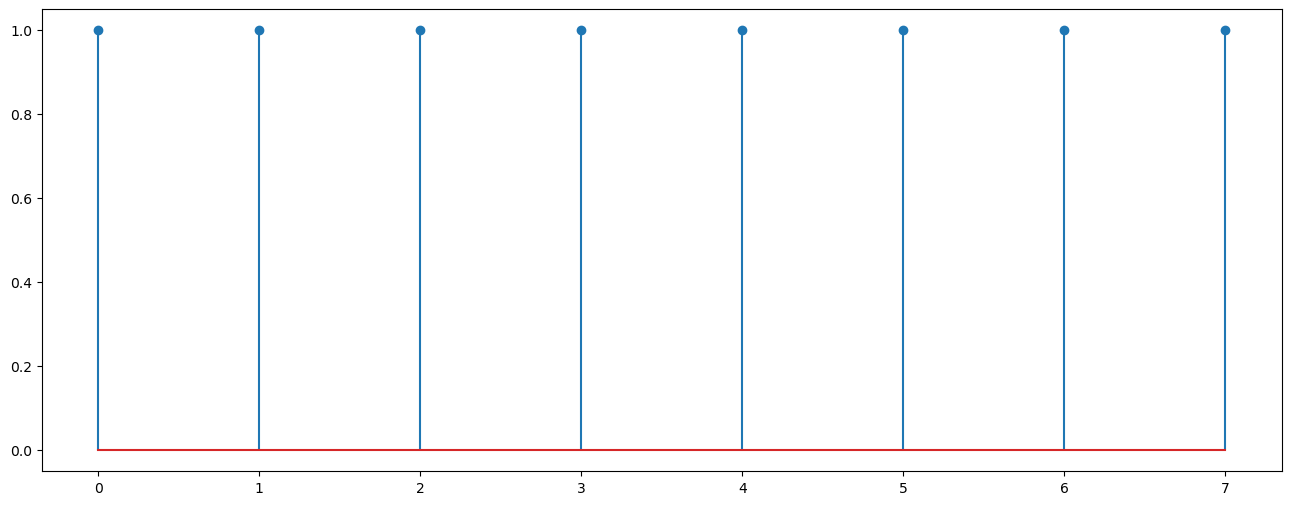

In [82]:
n = np.linspace(0,7,8)
x = [0]*len(n)
x[0] = 1
X1 = FFT8(x)
plt.stem(n,X1)

<StemContainer object of 3 artists>

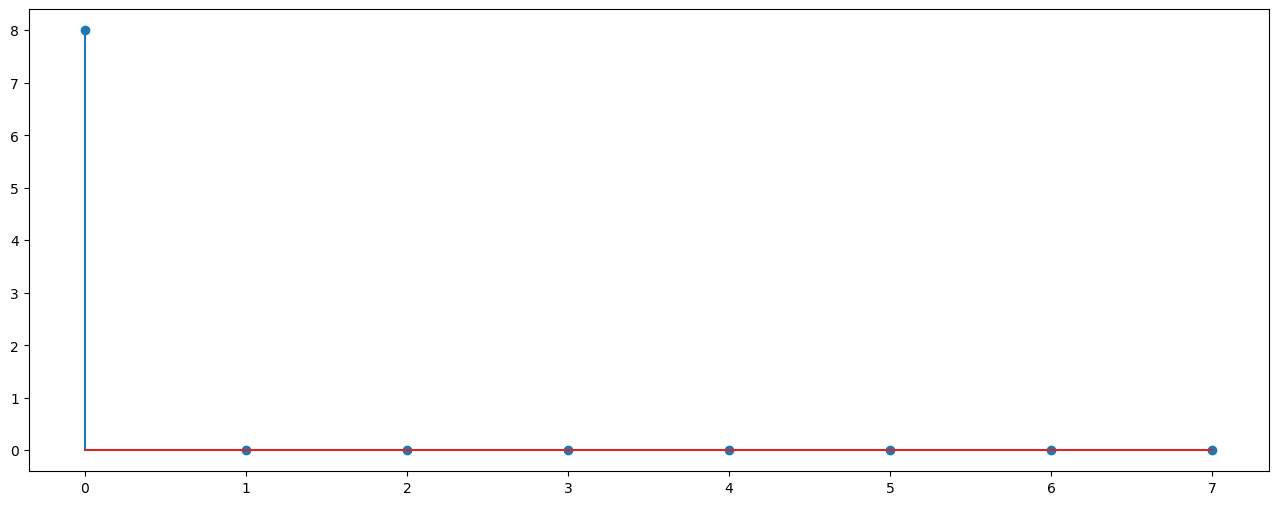

In [83]:
x = [1]*len(n)
X2 = FFT8(x)
plt.stem(n,X2)


<StemContainer object of 3 artists>

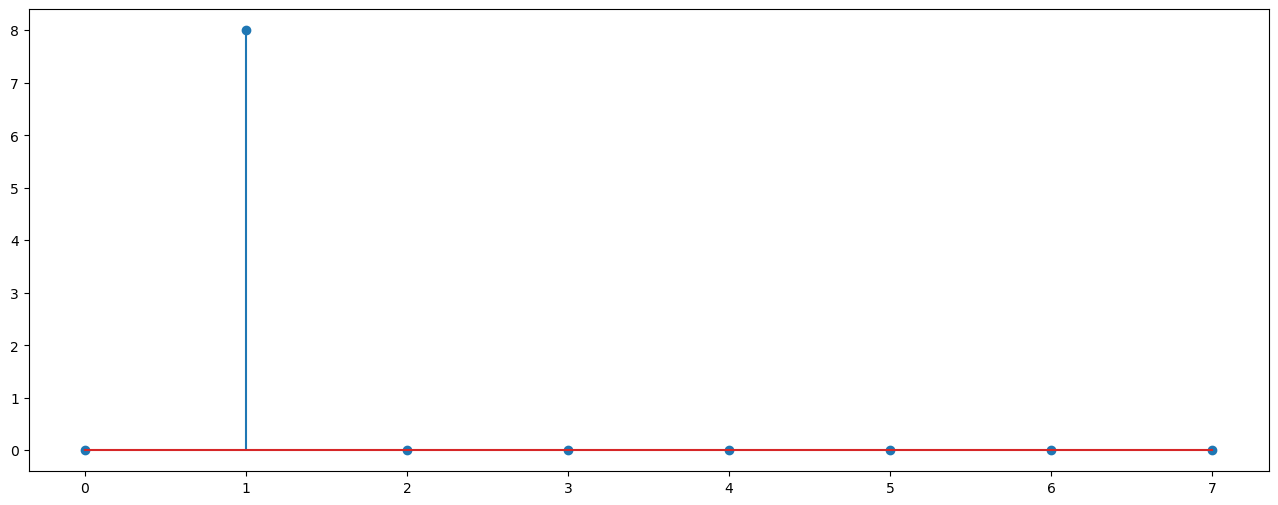

In [91]:
x = [0]*len(n)
for i in range(len(n)):
    x[i] = np.exp(1j*2*np.pi*i/8)
X3 = FFT8(x)
plt.stem(n,X3)


**3. List the output (not plot) of ```FFT8``` for the case $x[n] = 1$ for $N = 8$.**

In [85]:
print(X2)


[(8+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j]


**4. Calculate the total number of multiplies by twiddle factors required for your 8-point FFT. (A multiply is a multiplication by a real or complex number.)**

8

**5. Determine a formula for the number of multiplies required for an $N = 2^p$ point FFT. Leave the expression in terms of $N$ and $p$. How does this compare to the number of multiplies required for direct implementation when $p = 10$?**

That would be N multiplies. For direct implementation when p = 10, number of multiplies is 1024/2+(1024/2)^2 = 262656. Significantly reduced.

<h3 style="color:red;"><left>Exercise 3.3: Recursive Divide and Conquer (Part 2)</left></h3>

**1. Complete the recursive function `fft_stage` below to perform one stage of the FFT algorithm for a power-of-2 length signal.**

**Note:** the body of this function should look very similar to previous functions written in this lab.

In [86]:
def fft_stage(x):
    """
    Performs one stage of the FFT algorithm for a power-of-2 length signal
    
    Parameters:
    ---
    x: a power-of-2 length signal
    
    Returns:
    ---
    X: the DFT of the inpu signal
    """
    
    # Step 1
    # Determine the length of the input signal.
    N = len(x)
    
    # Step 2
    # If N == 2, then the function should just compute the 2-pt DFT as in equation (13), and then return.
    if N == 2:
        X = [0]*2
        X[0] = x[0]+x[1]
        X[1] = x[0]-x[1]
        return X
        
    # Step 3
    # If N > 2, then the function should perform the FFT steps described previously 
    # (i.e. decimate, compute (N/2)-pt DFTs, re-combine), 
    # calling fft_stage(x) to compute the (N/2)-pt DFTs.
    elif N > 2:
        X = [0]*N
        X0 = fft_stage(x[0:N:2])
        X1 = fft_stage(x[1:N:2])
    
        N_div_2 = int(N/2)
        W = [0]*N_div_2
        for k in range(N_div_2):
            W[k] = np.exp(-1j*2*np.pi*k/N)
        X = [0]*N
        for k in range(N_div_2):
            X[k] = X0[k] + W[k]*X1[k]
        
        for k in range(N_div_2):
            X[k+N_div_2] = X0[k] - W[k]*X1[k]
    
    return X

**2. Test ```fft_stage(x)``` on the three 8-point signals given above, and verify that it returns the same results as ```FFT8(x)```.**

**Make sure you plot the results in separate cells.**

<StemContainer object of 3 artists>

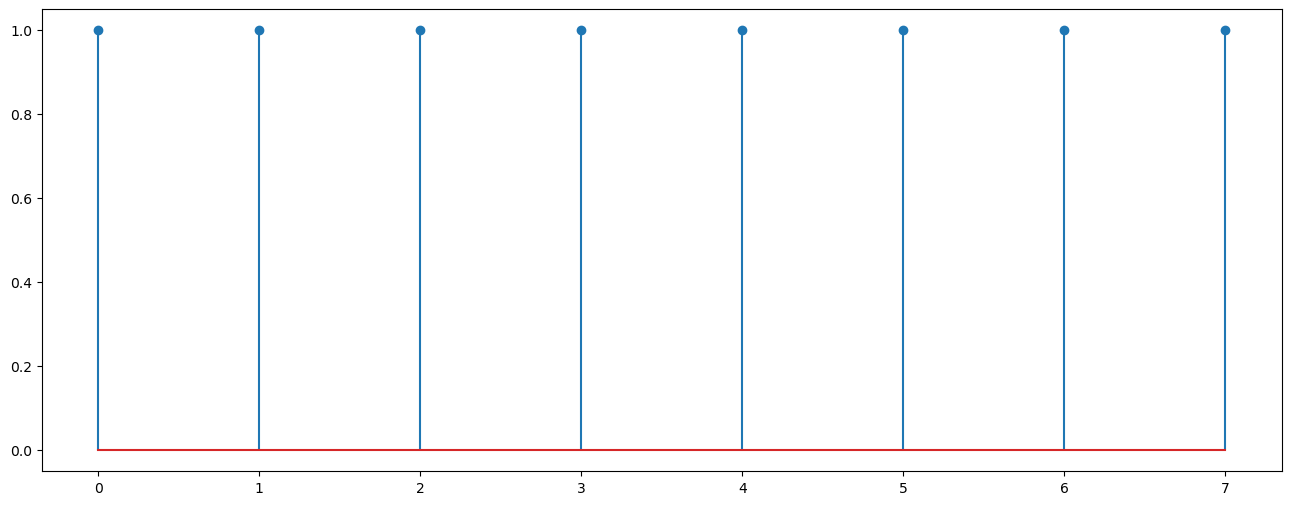

In [87]:
n = np.linspace(0,7,8)
x = [0]*len(n)
x[0] = 1
X1 = fft_stage(x)
plt.stem(n,X1)


<StemContainer object of 3 artists>

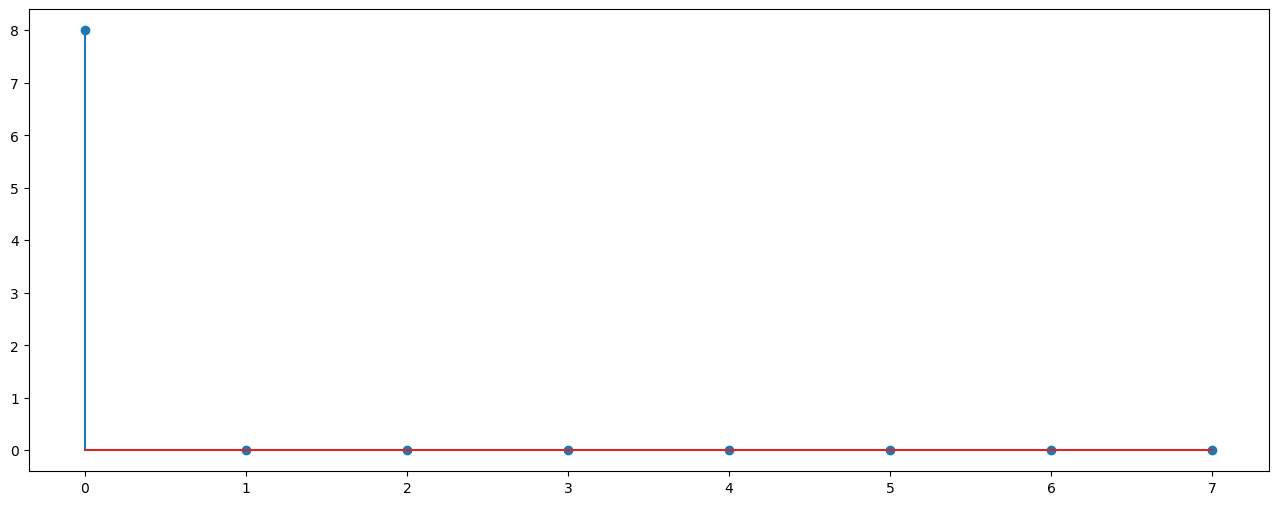

In [88]:
x = [1]*len(n)
X2 = fft_stage(x)
plt.stem(n,X2)

<StemContainer object of 3 artists>

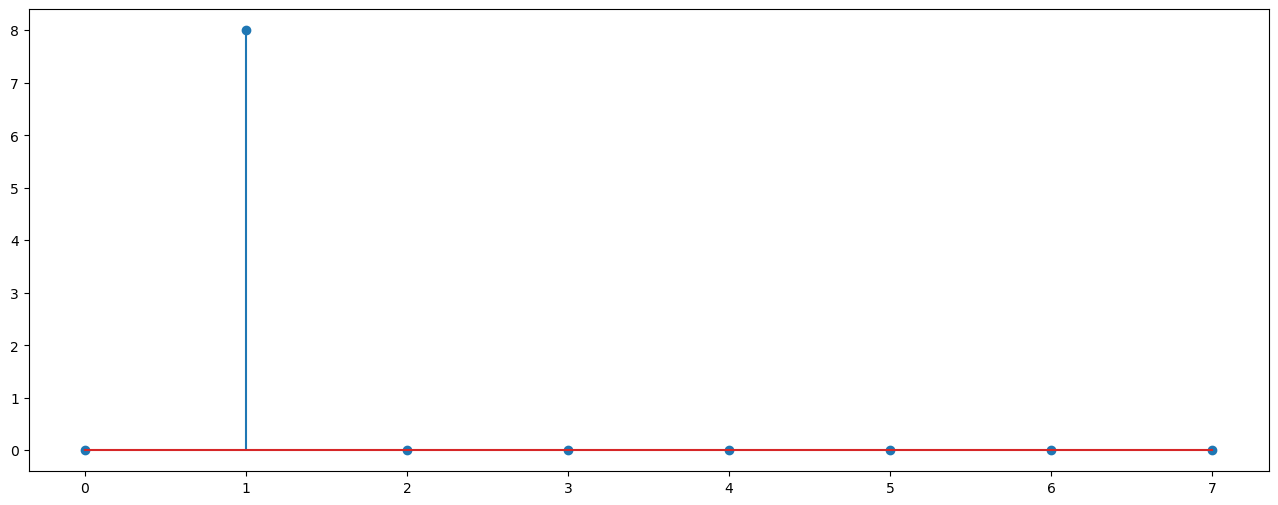

In [90]:
x = [0]*len(n)
for i in range(len(n)):
    x[i] = np.exp(1j*2*np.pi*i/8)
X3 = fft_stage(x)
plt.stem(n,X3)


<h2 style="color:salmon;"><left>4. References</left></h2>

[1] J. W. Cooley and J. W. Tukey, “An algorithm for the machine calculation of complex
Fourier series,” Mathematics of Computation, vol. 19, no. 90, p. 297-301, April 1965.